In [21]:
# Assignment 4
# Determining and removing drawbacks of exponential and running mean. Task 2.
# Team 2:
#     Ekaterina Karmanova
#     Timur Chikichev
#     Iaroslav Okunevich
#     Nikita Mikhailovskiy
#
# Skoltech, 07.10.2019

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
#Part I
#1
#Download monthly mean sunspot number from file
data = np.loadtxt('data_group2.txt',dtype={'names': ('year', 'month', 'monthly mean sunspot number'),
                     'formats': ('i4', 'i4', 'f4')})
years = np.array(data['year'])
monthes = np.array(data['month'])
x = data['monthly mean sunspot number']

In [5]:
#2
def RunningMean(array):
    length = array.size
    smooth_arr = np.empty([length])
    
    #Pre-calculation: mean of the first six entries in dataset
    mean_first = 0
    for i in range (6):
        mean_first += array[i]
    mean_first /= 6 

    #Pre-calculation: mean of the last six entries in dataset
    mean_last = 0
    for i in range (6):
        mean_last += array[length - i - 1]
    mean_last /= 6 

    #Calculation for smoothing data in array including 13 monthes
    for i in range (0,length):
        if i < 6:
            smooth_arr[i] = mean_first
        elif i > (length - 7):
            smooth_arr[i] = mean_last
        else:
            #last values (less weighted)
            smooth_arr[i] = 1/24*array[i-6]
            smooth_arr[i] += 1/24*array[i+6]
            #middle values, counting the sum
            sum_it = 0
            for n in range (11):
                it = n - 5
                sum_it += 1/12*(array[i-it])
            smooth_arr[i] = sum_it
    return smooth_arr

r=RunningMean(x)

In [6]:
def Expsmoothing(alfa,z):
    array=np.zeros(len(z))
    array[0]=10
    for i in range(1,len(z)):
                array[i]=array[i-1]+alfa*(z[i]-array[i-1])    
    return array

In [7]:
def BackExpSmoothing(alfa,exp):
    array=np.zeros(len(exp))
    array[len(exp)-1]=exp[len(exp)-1]
    for i in range(len(exp)-2,-1,-1):
                array[i]=array[i+1]+alfa*(exp[i]-array[i+1])    
    return array

In [8]:
def DevVarInd(z,x):  
    Id=[0,0]
    for i in range(0,len(z)):
                Id[0]+=(z[i]-x[i])**2    
    for i in range(0,len(z)-2):
                Id[1]+=(x[i+2]-2*x[i+1]+x[i])**2          
    return Id

In [9]:
#Parsing years and monthes to get proper timestamp
from datetime import date
dates = [None]*years.size
for i in range (0,years.size):
    dates[i] = date(years[i], monthes[i],int(1))

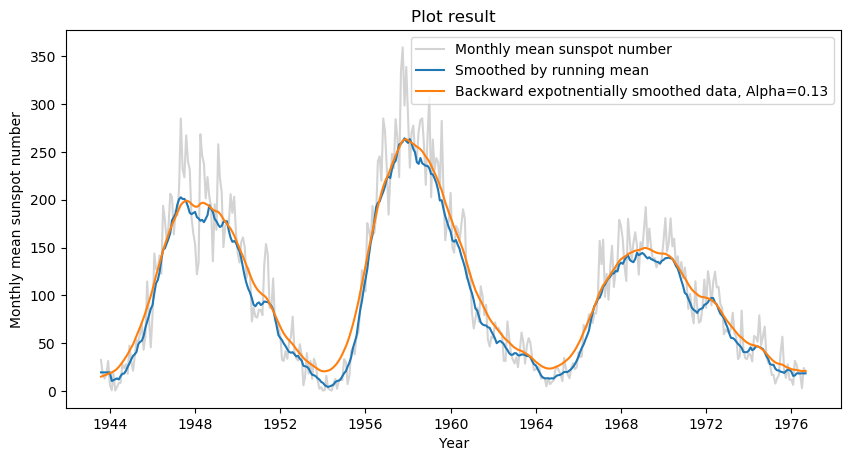

In [10]:
def FindingAlpha(z,r,step, dates):
    figure(num=None, figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
    plt.plot(dates,z,label='Monthly mean sunspot number',c='lightgrey')
    plt.plot(dates,r,label='Smoothed by running mean')
    
    minInd=DevVarInd(z,r)
    minAlpha=0
    for i in range(1,int(1/step)):
        exp=Expsmoothing(i*step,z)
        bexp=BackExpSmoothing(i*step,exp)
        indBexp=DevVarInd(z,bexp)
        if (indBexp[0]<minInd[0])and(indBexp[1]<minInd[1]):
            minInd=indBexp
            minAlpha=i*step
    exp=Expsmoothing(minAlpha,z)
    bexp=BackExpSmoothing(minAlpha,exp)
    plt.plot(dates,bexp,label='Backward expotnentially smoothed data, Alpha={}'.format(minAlpha))
    plt.title('Plot result')
    plt.ylabel('Monthly mean sunspot number')
    plt.xlabel('Year')    
    plt.legend()
    plt.show() 
FindingAlpha(x,r,0.01,dates)

In [11]:
#Part II
from statistics import variance 
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [12]:
#1
#Data parsing from file
trueSurface = np.loadtxt('true_surface.txt')
noiseSurface=np.loadtxt('noisy_surface.txt')

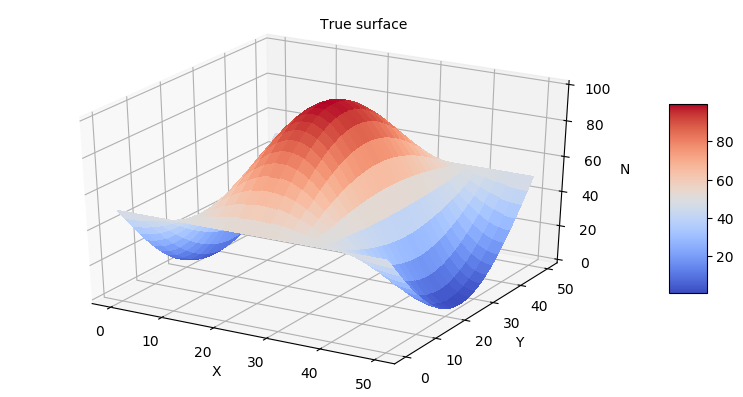

In [13]:
#2
fig = plt.figure(num=None, figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
X = np.arange(0, trueSurface.shape[0], 1)
Y = np.arange(0, trueSurface.shape[1], 1)
X, Y = np.meshgrid(X, Y)

# Plot the surface.
surf=ax.plot_surface(X, Y, trueSurface, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('N')
ax.text2D(0.50, 0.95, "True surface", transform=ax.transAxes)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

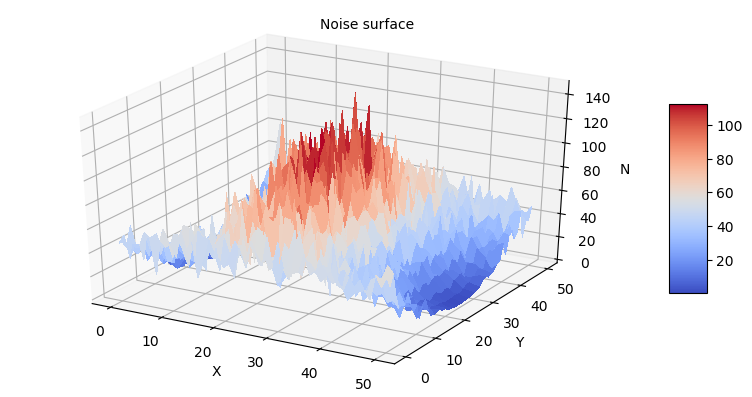

In [14]:
fig = plt.figure(num=None, figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
X = np.arange(0, noiseSurface.shape[0], 1)
Y = np.arange(0, noiseSurface.shape[1], 1)
X, Y = np.meshgrid(X, Y)

# Plot the surface.
surf=ax.plot_surface(X, Y, noiseSurface, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('N')
ax.text2D(0.50, 0.95, "Noise surface", transform=ax.transAxes)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [15]:
#3
def VarianceOfDeviation(noise,true):  
    difference=np.ravel(noise)-np.ravel(true)
    return variance(difference)
varOfDev=VarianceOfDeviation(noiseSurface,trueSurface)
varOfDev

122.05477678749108

In [16]:
#4
from copy import copy, deepcopy
def BackExpSmoothingForMatrix(alpha,noise):
    answer=deepcopy(noise)
    for i in range(0,len(answer)):
                row=answer[i]
                exp=Expsmoothing(alpha,row)
                answer[i]=BackExpSmoothing(alpha,exp) 
    transposeNoise=np.transpose(answer)     
    for i in range(0,len(answer)):
                column=transposeNoise[i]
                exp=Expsmoothing(alpha,column)
                transposeNoise[i]=BackExpSmoothing(alpha,exp) 
    answer=np.transpose(transposeNoise)
    return answer
smoothSurface=BackExpSmoothingForMatrix(0.335,noiseSurface)

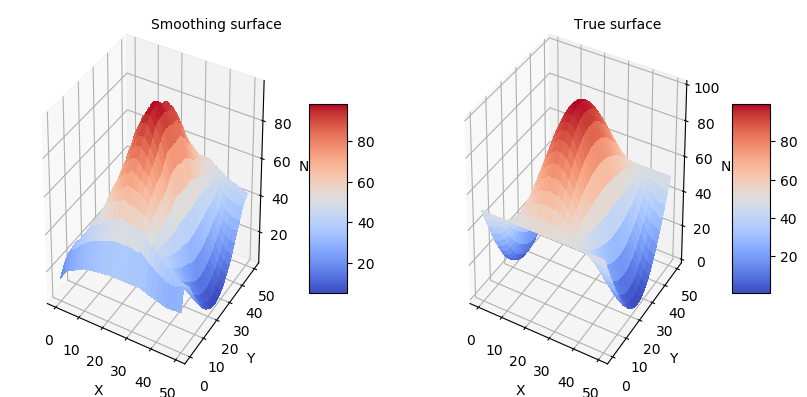

In [17]:
#5
fig = plt.figure(num=None, figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')

#ax = fig.gca(projection='3d')
X = np.arange(0, smoothSurface.shape[0], 1)
Y = np.arange(0, smoothSurface.shape[1], 1)
X, Y = np.meshgrid(X, Y)

# Plot the surface.
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.text2D(0.50, 0.95, "Smoothing surface", transform=ax.transAxes)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('N')
surf=ax.plot_surface(X, Y, smoothSurface, cmap=cm.coolwarm, linewidth=0, antialiased=False,label='Smoothed by running mean')
fig.colorbar(surf, shrink=0.5, aspect=5)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.text2D(0.50, 0.95, "True surface", transform=ax.transAxes)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('N')
surf=ax.plot_surface(X, Y, trueSurface, cmap=cm.coolwarm, linewidth=0, antialiased=False,label='Smoothed by running mean')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [18]:
#6
varOfDevNew2=VarianceOfDeviation(smoothSurface,trueSurface)
varOfDevNew2

29.0798359966985

In [19]:
#7
smoothSurface1=BackExpSmoothingForMatrix(0.2,noiseSurface)
varOfDevNew=VarianceOfDeviation(smoothSurface1,trueSurface)
print('Alpha= 0.2, the variance of deviation=',varOfDevNew)
smoothSurface2=BackExpSmoothingForMatrix(0.4,noiseSurface)
varOfDevNew=VarianceOfDeviation(smoothSurface2,trueSurface)
print('Alpha= 0.4, the variance of deviation=',varOfDevNew)

Alpha= 0.2, the variance of deviation= 70.38278504607774
Alpha= 0.4, the variance of deviation= 25.641573139711337


In [20]:
smoothSurface2=BackExpSmoothingForMatrix(0.445,noiseSurface)
varOfDevNew=VarianceOfDeviation(smoothSurface2,trueSurface)
print('Alpha= 0.445, the variance of deviation=',varOfDevNew)

Alpha= 0.445, the variance of deviation= 25.085600591985504
